#Global (solo correr)

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import kn
from scipy import integrate

In [33]:
# constantes
pi = np.pi
G = 6.67430e-11                                           # cte de Cavendish
r_inf = 0.001                                             # radio inferior en la simulación
r_sup = 100.0                                             # radio superior en la simulación (para contrastar con la data)
H = 70.4e-3                                               # cte de Hubble (km/s*kpc)

#               (Best fitting Model - McMillan)
#Parámetros del bulbo galático
rho_0b = 9.84e10
rho_0b_arange = np.arange(8.76e10, 10.6e10, 0.2e10)
r_0 = 0.075
rcut= 2.1
a = 1.8

# Parámetros del disco galáctico
E_0_thin = 896e6                                          # Densidad superficial central thin (M_sun/kpc^2)
E_0_thin_arange = np.arange(770.5e6, 1003e6, 50e6)        # Rango (alrededor de la media)
E_0_thick = 183e6                                         # Densidad superficial central thick (M_sun/kpc^2)
E_0_thick_arange = np.arange(97.8e6, 216e6, 26.2e6)       # Rango
z_d_thin = 0.3                                            # Scale height de la vía láctea (kpc) (disco fixed)
z_d_thick = 0.9                                           # Scale height de la vía láctea (kpc) (disco fixed)
R_d_thin = 2.5                                            # Scale length de la vía láctea (kpc) - 2.5 a 4.5 kpc
R_d_thin_arange = np.arange(2.39, 2.68, 0.06)             # Rango
R_d_thick = 3.02                                          # Scale length de la vía láctea (kpc) - 2.5 a 4.5 kpc
R_d_thick_arange = np.arange(2.84, 3.93, 0.24)            # Rango

#Parámetros del disco de gases
R_m = 12.0                                                # Scale length of the hole in the centre (kpc)
z_gas = 0.045                                             # Scale height de la vía láctea (kpc) (gas fixed)

# Parámetros del halo galáctico
rho_crit = (3 * (H**2)) / (8 * np.pi * G)
r_s = 19.6                                                # Scale radius del halo (kpc)
r_s_arange = np.arange(14.1, 24, 2.45)                    # Rango
d_c = 4.0

# Parámetros del modelo concentración.
c = np.arange(0, 50.5, 0.5)

In [34]:
# Array de radios para evaluar la masa y la velocidad
radios = np.arange(r_inf, r_sup + 1)

# Función para calcular la velocidad de una estrella en función del radio y la masa
def velocidad_circular(r, masa):
    return np.sqrt(G * masa / r) * 100

# Planteamiento del Proyecto

Consideremos el teorema del virial, es decir
\begin{equation}
2K+U=0,
\end{equation}
donde U es la energía potencial de una estrella de massa $m$ que se mueve con una orbita circular en el plano del disco galáctico. Esta energía potencial es el resultado de toda la masa contenida al interior del radio $r$ en el que se localiza la estrella.
Siempre y cuando, consideremos que el campo gravitacional es esféricamente simétrico. K es la energía cinética ligada a esta partícula.

Ahora podemos relacionar la velocidad de rotación con las distribuconies de masa de la galaxia.
Tomemos por ejemplo las estimaciones hechas por McMillan 2016 (arXiv:1608.00971) para la via lactea y comparemos con observaciones recientes recopiladas en el archivo "vc_combined.dat".

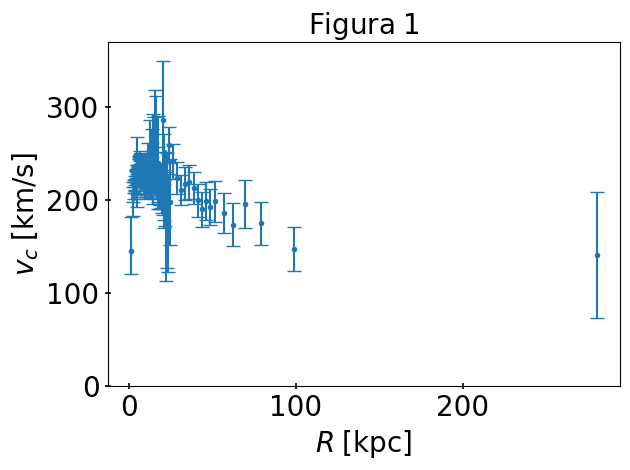

In [5]:

# load data
dat =  np.loadtxt("/content/drive/MyDrive/TOPICOS/vc_combined.dat")

# define los arreglos
R           = dat[:,0]
vc_MW       = dat[:,-3]

vc_err_M  = dat[:,-2]
vc_err_P  = dat[:,-1]

# hacer el grafico
fig, ax= plt.subplots()
# MW plot
ax.errorbar(R,vc_MW,yerr=[vc_err_M,vc_err_P], fmt='.' ,capsize=5)


# Cosmeticos
ax.set_xlabel(r"$ R \; \rm [kpc] $",fontsize=20)
ax.set_ylabel(r"$ v_c \; \rm [km/s]  $",fontsize=20)
ax.set_ylim(0,370)
ax.tick_params(axis='both', which='major', labelsize=20,
               size=5,width=1.2,direction="inout")
ax.set_title(r"$\rm Figura\; 1$",fontsize=20)
plt.tight_layout()

Las referencias de estas observaciones están en el archivo vc_combined.dat en lineas comentadas.


Como se observa en la Figura 1 la velocidad circular aumenta rapidamente hasta que alcanza una $V_{\rm max}\simeq 200$ km/s.
Considerando que el disco galáctico estelar se extiende hasta unos 30 kpc del centro, y el gaseoso unos 10 kpc más,
hace el hecho de que la curva de rotación se mantenga constante hasta mucho mas afuera sea dificil de explicar solo con estrellas y gas.




## Ejercicio 1

Partiendo del teorema del virial escriba la expresion para la velocidad circular de una estrella en el disco galactico.

## Ejercicio 2

Suponiendo simetría esférica integre por separado las equaciones (1),(3) y (4) para la el bulbo estelar, el disco estalar y un disco gaseoso. Los valores necesarios de todos los parametros estan en el paper.
la idea es obtener la masa de cada componente en funcion del radio y obtener la velocidad circular correspondiente a cada componente en funcion del radio.




## Ejercicio 3


Compare las velocidades circulares obtenidas con las observaciones de la Figura 1. Y si la suma de las differentes contribuciones gracias a las estrellas y el gas
no son suficientes para explicar las observaciones, porceda a agregar la velocidad circular inducidad por el halo de materia oscura (ecuacion 5).



## Bonus

El parametro $\gamma$ en la ecuacion 5 representa la pendiente del perfil de materia oscura en el centro galactico. Actualmente este parametro es protagonista de tensiones entre las observaciones y simulaciones cosmologicas.
Compare la diferencia entre considerar un cuspide o cusp ($\gamma=1$) y un nucleo o core ($\gamma\sim 0$) en las curvas de rotacion. Y discuta a su parecer cual valor representa mejor las observaciones.





Consejos: considere hacer una prueba de $\chi^2$ de cada prediccion contra las observaciones, probando solo los puntos con $R<8$.

#Bulbo Galáctico

In [6]:
# Densidad de masa bulbo
def rho_bulbo(r):
    return 4 * np.pi * ((rho_0b) / (1 + (r / r_0)) ** a) * (np.e**(-(r / rcut) ** 2))

def rho_bulbo_0(r):
    return 4 * np.pi * ((rho_0b_arange[0]) / (1 + (r / r_0)) ** a) * (np.e**(-(r / rcut) ** 2))

def rho_bulbo_1(r):
    return 4 * np.pi * ((rho_0b_arange[1]) / (1 + (r / r_0)) ** a) * (np.e**(-(r / rcut) ** 2))

def rho_bulbo_2(r):
    return 4 * np.pi * ((rho_0b_arange[2]) / (1 + (r / r_0)) ** a) * (np.e**(-(r / rcut) ** 2))

def rho_bulbo_3(r):
    return 4 * np.pi * ((rho_0b_arange[3]) / (1 + (r / r_0)) ** a) * (np.e**(-(r / rcut) ** 2))

def rho_bulbo_7(r):
    return 4 * np.pi * ((rho_0b_arange[7]) / (1 + (r / r_0)) ** a) * (np.e**(-(r / rcut) ** 2))

def rho_bulbo_8(r):
    return 4 * np.pi * ((rho_0b_arange[8]) / (1 + (r / r_0)) ** a) * (np.e**(-(r / rcut) ** 2))

def rho_bulbo_9(r):
    return 4 * np.pi * ((rho_0b_arange[9]) / (1 + (r / r_0)) ** a) * (np.e**(-(r / rcut) ** 2))

In [7]:
# # Arrays de masa y velocidad
masas_bulbo = np.array([integrate.quad(rho_bulbo,r_inf,r)[0] for r in radios])
velocidades_bulbo = np.array([velocidad_circular(r, masa) for r, masa in zip(radios, masas_bulbo)])
masas_bulbo_0 = np.array([integrate.quad(rho_bulbo_0,r_inf,r)[0] for r in radios])
velocidades_bulbo_0 = np.array([velocidad_circular(r, masa) for r, masa in zip(radios, masas_bulbo_0)])
masas_bulbo_1 = np.array([integrate.quad(rho_bulbo_1,r_inf,r)[0] for r in radios])
velocidades_bulbo_1 = np.array([velocidad_circular(r, masa) for r, masa in zip(radios, masas_bulbo_1)])
masas_bulbo_2 = np.array([integrate.quad(rho_bulbo_2,r_inf,r)[0] for r in radios])
velocidades_bulbo_2 = np.array([velocidad_circular(r, masa) for r, masa in zip(radios, masas_bulbo_2)])
masas_bulbo_3 = np.array([integrate.quad(rho_bulbo_3,r_inf,r)[0] for r in radios])
velocidades_bulbo_3 = np.array([velocidad_circular(r, masa) for r, masa in zip(radios, masas_bulbo_3)])
masas_bulbo_7 = np.array([integrate.quad(rho_bulbo_7,r_inf,r)[0] for r in radios])
velocidades_bulbo_7 = np.array([velocidad_circular(r, masa) for r, masa in zip(radios, masas_bulbo_7)])
masas_bulbo_8 = np.array([integrate.quad(rho_bulbo_8,r_inf,r)[0] for r in radios])
velocidades_bulbo_8 = np.array([velocidad_circular(r, masa) for r, masa in zip(radios, masas_bulbo_8)])
masas_bulbo_9 = np.array([integrate.quad(rho_bulbo_9,r_inf,r)[0] for r in radios])
velocidades_bulbo_9 = np.array([velocidad_circular(r, masa) for r, masa in zip(radios, masas_bulbo_9)])


#Disco Galáctico

In [8]:
# Densidad de masa del disco

# Parámetros del disco galáctico
E_0 = 40.0e6  # Densidad superficial central (M_sun/kpc^2)
z_d = 0.3  # Scale height (kpc)
R_d = 2.5  # Scale length (kpc)
def rho_disco(R, z):
    return (E_0 / (2 * z_d)) * np.exp((-np.abs(z) / z_d) - (R / R_d))

def rho_disco_thin(R, z):
    return (E_0_thin / (2 * z_d_thin)) * np.e**((-np.abs(z) / z_d_thin) - (R / R_d_thin))

def rho_disco_thin_0(R, z):
    return (E_0_thin_arange[0] / (2 * z_d_thin)) * np.e**((-np.abs(z) / z_d_thin) - (R / R_d_thin_arange[0]))

def rho_disco_thin_4(R, z):
    return (E_0_thin_arange[4] / (2 * z_d_thin)) * np.e**((-np.abs(z) / z_d_thin) - (R / R_d_thin_arange[4]))

def rho_disco_thick(R, z):
    return (E_0_thick / (2 * z_d_thick)) * np.e**((-np.abs(z) / z_d_thin) - (R / R_d_thick))

def rho_disco_thick_0(R, z):
    return (E_0_thick_arange[0] / (2 * z_d_thick)) * np.e**((-np.abs(z) / z_d_thin) - (R / R_d_thick_arange[0]))

def rho_disco_thick_4(R, z):
    return (E_0_thick_arange[4] / (2 * z_d_thick)) * np.e**((-np.abs(z) / z_d_thin) - (R / R_d_thick_arange[4]))

In [9]:
# Arrays de masa y velocidad del disco

masas_disco_thin = np.array([2*np.pi*(integrate.dblquad(rho_disco_thin,0,R,-z_d_thin,z_d_thin)[0]) for R in radios])
masas_disco_thick = np.array([2*np.pi*(integrate.dblquad(rho_disco_thick,0,R,-z_d_thick,z_d_thick)[0]) for R in radios])
velocidades_disco_thin = np.array([velocidad_circular(r, masa) for r, masa in zip(radios, masas_disco_thin)])
velocidades_disco_thick = np.array([velocidad_circular(r, masa) for r, masa in zip(radios, masas_disco_thick)])

masas_disco_thin_0 = np.array([2*np.pi*(integrate.dblquad(rho_disco_thin_0,0,R,-z_d_thin,z_d_thin)[0]) for R in radios])
masas_disco_thick_0 = np.array([2*np.pi*(integrate.dblquad(rho_disco_thick_0,0,R,-z_d_thick,z_d_thick)[0]) for R in radios])
velocidades_disco_thin_0 = np.array([velocidad_circular(r, masa) for r, masa in zip(radios, masas_disco_thin_0)])
velocidades_disco_thick_0 = np.array([velocidad_circular(r, masa) for r, masa in zip(radios, masas_disco_thick_0)])

masas_disco_thin_4 = np.array([2*np.pi*(integrate.dblquad(rho_disco_thin_4,0,R,-z_d_thin,z_d_thin)[0]) for R in radios])
masas_disco_thick_4 = np.array([2*np.pi*(integrate.dblquad(rho_disco_thick_4,0,R,-z_d_thick,z_d_thick)[0]) for R in radios])
velocidades_disco_thin_4 = np.array([velocidad_circular(r, masa) for r, masa in zip(radios, masas_disco_thin_4)])
velocidades_disco_thick_4 = np.array([velocidad_circular(r, masa) for r, masa in zip(radios, masas_disco_thick_4)])

#Disco Gases

In [10]:
# Función de densidad de masa del disco galáctico de gases
def rho_gas_thin(R, z):
    sech = 1 / np.cosh(z / (2 * z_gas))
    return (E_0_thin / (4 * z_gas)) * np.e**((-R_m / R) - (R / R_d_thin)) * sech**2

def rho_gas_thin_0(R, z):
    sech = 1 / np.cosh(z / (2 * z_gas))
    return (E_0_thin_arange[0] / (4 * z_gas)) * np.e**((-R_m / R) - (R / R_d_thin_arange[0])) * sech**2

def rho_gas_thin_4(R, z):
    sech = 1 / np.cosh(z / (2 * z_gas))
    return (E_0_thin_arange[4] / (4 * z_gas)) * np.e**((-R_m / R) - (R / R_d_thin_arange[4])) * sech**2

def rho_gas_thick(R, z):
    sech = 1 / np.cosh(z / (2 * z_gas))
    return (E_0_thick / (4 * z_gas)) * np.e**((-R_m / R) - (R / R_d_thick)) * sech**2

def rho_gas_thick_0(R, z):
    sech = 1 / np.cosh(z / (2 * z_gas))
    return (E_0_thick_arange[0] / (4 * z_gas)) * np.e**((-R_m / R) - (R / R_d_thick_arange[0])) * sech**2

def rho_gas_thick_4(R, z):
    sech = 1 / np.cosh(z / (2 * z_gas))
    return (E_0_thick_arange[4] / (4 * z_gas)) * np.e**((-R_m / R) - (R / R_d_thick_arange[4])) * sech**2

In [11]:
# Masa gas mediante Simpson
def m_simpson_gas_thin(n, R, z_inf, z_sup):
    h = (z_sup - z_inf) / n
    z_values = np.linspace(z_inf, z_sup, n + 1)
    f_values = rho_gas_thin(R, z_values)
    integral = (h / 3) * (f_values[0] + f_values[-1] + 4 * np.sum(f_values[1:-1:2]) + 2 * np.sum(f_values[2:-1:2]))
    return integral

def m_simpson_gas_thin_0(n, R, z_inf, z_sup):
    h = (z_sup - z_inf) / n
    z_values = np.linspace(z_inf, z_sup, n + 1)
    f_values = rho_gas_thin_0(R, z_values)
    integral = (h / 3) * (f_values[0] + f_values[-1] + 4 * np.sum(f_values[1:-1:2]) + 2 * np.sum(f_values[2:-1:2]))
    return integral

def m_simpson_gas_thin_4(n, R, z_inf, z_sup):
    h = (z_sup - z_inf) / n
    z_values = np.linspace(z_inf, z_sup, n + 1)
    f_values = rho_gas_thin_4(R, z_values)
    integral = (h / 3) * (f_values[0] + f_values[-1] + 4 * np.sum(f_values[1:-1:2]) + 2 * np.sum(f_values[2:-1:2]))
    return integral

def m_simpson_gas_thick(n, R, z_inf, z_sup):
    h = (z_sup - z_inf) / n
    z_values = np.linspace(z_inf, z_sup, n + 1)
    f_values = rho_gas_thick(R, z_values)
    integral = (h / 3) * (f_values[0] + f_values[-1] + 4 * np.sum(f_values[1:-1:2]) + 2 * np.sum(f_values[2:-1:2]))
    return integral

def m_simpson_gas_thick_0(n, R, z_inf, z_sup):
    h = (z_sup - z_inf) / n
    z_values = np.linspace(z_inf, z_sup, n + 1)
    f_values = rho_gas_thick_0(R, z_values)
    integral = (h / 3) * (f_values[0] + f_values[-1] + 4 * np.sum(f_values[1:-1:2]) + 2 * np.sum(f_values[2:-1:2]))
    return integral

def m_simpson_gas_thick_4(n, R, z_inf, z_sup):
    h = (z_sup - z_inf) / n
    z_values = np.linspace(z_inf, z_sup, n + 1)
    f_values = rho_gas_thick_4(R, z_values)
    integral = (h / 3) * (f_values[0] + f_values[-1] + 4 * np.sum(f_values[1:-1:2]) + 2 * np.sum(f_values[2:-1:2]))
    return integral

In [12]:
# Arrays de masa y velocidad
masas_gas_thin = np.array([m_simpson_gas_thin(100000, R, -z_gas, z_gas) for R in radios])
masas_gas_thick = np.array([m_simpson_gas_thick(100000, R, -z_gas, z_gas) for R in radios])
velocidades_gas_thin = np.array([velocidad_circular(r, masa) for r, masa in zip(radios, masas_gas_thin)])
velocidades_gas_thick = np.array([velocidad_circular(r, masa) for r, masa in zip(radios, masas_gas_thick)])

masas_gas_thin_0 = np.array([m_simpson_gas_thin_0(100000, R, -z_gas, z_gas) for R in radios])
masas_gas_thick_0 = np.array([m_simpson_gas_thick_0(100000, R, -z_gas, z_gas) for R in radios])
velocidades_gas_thin_0 = np.array([velocidad_circular(r, masa) for r, masa in zip(radios, masas_gas_thin_0)])
velocidades_gas_thick_0 = np.array([velocidad_circular(r, masa) for r, masa in zip(radios, masas_gas_thick_0)])

masas_gas_thin_4 = np.array([m_simpson_gas_thin_4(100000, R, -z_gas, z_gas) for R in radios])
masas_gas_thick_4 = np.array([m_simpson_gas_thick_4(100000, R, -z_gas, z_gas) for R in radios])
velocidades_gas_thin_4 = np.array([velocidad_circular(r, masa) for r, masa in zip(radios, masas_gas_thin_4)])
velocidades_gas_thick_4 = np.array([velocidad_circular(r, masa) for r, masa in zip(radios, masas_gas_thick_4)])

#Gráficas sin Halo de materia oscura

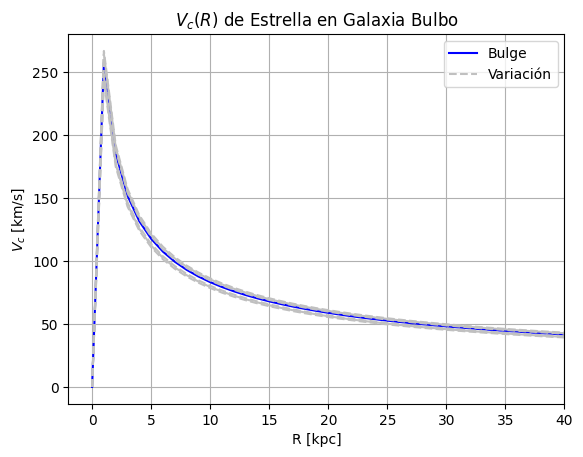

In [13]:
# Gráfica Bulbo Galáctico
plt.plot(radios, velocidades_bulbo, label='Bulge', color='blue')
plt.plot(radios, velocidades_bulbo_0, label='Variación', color='silver', ls='--')
plt.plot(radios, velocidades_bulbo_1, color='silver', ls='--')
plt.plot(radios, velocidades_bulbo_2, color='silver', ls='--')
plt.plot(radios, velocidades_bulbo_7, color='silver', ls='--')
plt.plot(radios, velocidades_bulbo_8, color='silver', ls='--')
plt.plot(radios, velocidades_bulbo_9, color='silver', ls='--')

plt.xlabel('R [kpc]')
plt.ylabel('$V_c$ [km/s]')
plt.title('$V_c(R)$ de Estrella en Galaxia Bulbo')
plt.grid(True)
plt.xlim(-2, 40)
plt.legend()
plt.show()

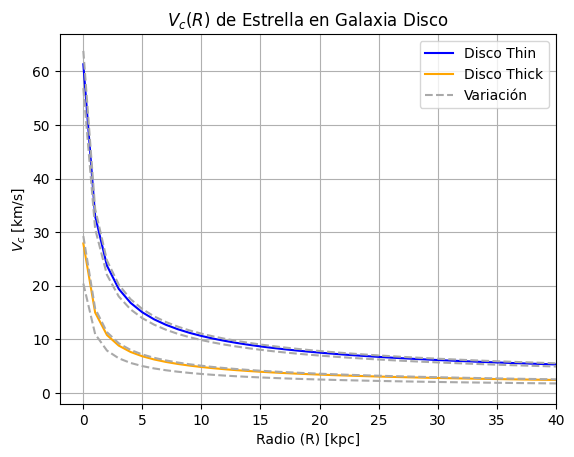

In [14]:
# Graficar Disco Galáctico
plt.plot(radios, velocidades_disco_thin, label='Disco Thin', color='blue')
plt.plot(radios, velocidades_disco_thick, label='Disco Thick', color='orange')
plt.plot(radios, velocidades_disco_thin_0, color='darkgrey', label='Variación', ls='--')
plt.plot(radios, velocidades_disco_thick_0, color='darkgrey', ls='--')
plt.plot(radios, velocidades_disco_thin_4, color='darkgrey', ls='--')
plt.plot(radios, velocidades_disco_thick_4, color='darkgrey', ls='--')
plt.xlabel('Radio (R) [kpc]')
plt.ylabel('$V_c$ [km/s]')
plt.title('$V_c(R)$ de Estrella en Galaxia Disco')
plt.grid(True)
plt.xlim(-2, 40)
plt.legend()
plt.show()

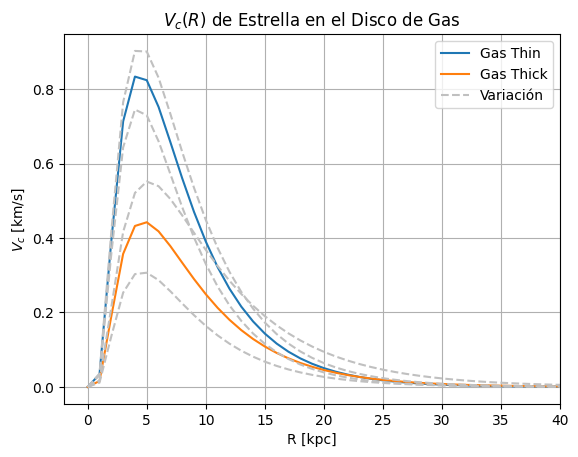

In [15]:
# Graficar Disco de Gases
plt.plot(radios, velocidades_gas_thin, label='Gas Thin')
plt.plot(radios, velocidades_gas_thick, label='Gas Thick')
plt.plot(radios, velocidades_gas_thin_0, color='silver', label='Variación', ls='--')
plt.plot(radios, velocidades_gas_thick_0, color='silver', ls='--')
plt.plot(radios, velocidades_gas_thin_4, color='silver', ls='--')
plt.plot(radios, velocidades_gas_thick_4, color='silver', ls='--')
plt.xlabel('R [kpc]')
plt.ylabel('$V_c$ [km/s]')
plt.title('$V_c(R)$ de Estrella en el Disco de Gas')
plt.grid(True)
plt.xlim(-2, 40)
plt.legend()
plt.show()

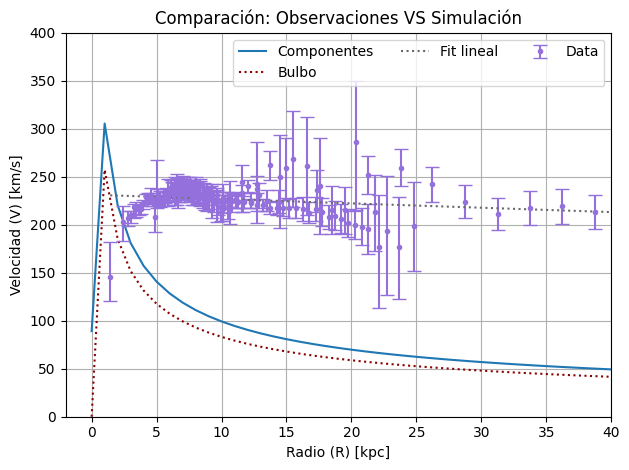

In [16]:
# Graficar Suma sin halo
plt.plot(radios, (velocidades_bulbo)+(velocidades_disco_thin)+(velocidades_disco_thick)+(velocidades_gas_thin)+(velocidades_gas_thick), label='Componentes')
plt.plot(radios, velocidades_bulbo, label='Bulbo', color='darkred', ls='dotted')

# Gráfica Datos
dat = np.loadtxt("/content/drive/MyDrive/TOPICOS/vc_combined.dat")
R = dat[:, 0]
vc_MW = dat[:, -3]
vc_err_M = dat[:, -2]
vc_err_P = dat[:, -1]
plt.errorbar(R, vc_MW, yerr=[vc_err_M, vc_err_P], fmt='.', capsize=5, label='Data', color='mediumpurple')

# FIT
coefficients = np.polyfit(R, vc_MW, 1)  # Grado 1 para una línea recta
slope = coefficients[0]  # Pendiente
intercept = coefficients[1]  # Término independiente
R_line = np.linspace(min(R), max(R), 100)
vc_MW_line = slope * R_line + intercept
plt.plot(R_line, vc_MW_line, color='dimgrey', ls='dotted', label='Fit lineal')

# Cosméticos y leyendas
plt.xlabel('Radio (R) [kpc]')
plt.ylabel('Velocidad (V) [km/s]')
plt.title('Comparación: Observaciones VS Simulación')
plt.legend(ncol=3)
plt.xlim(-2, 40)
plt.ylim(0, 400)
plt.grid(True)
plt.tight_layout()
plt.show()

#Halo

In [35]:
# Halo crit
masas_halo_crit = np.array([(4*np.pi*d_c*rho_crit*(r_s**3)*(np.log(1+(r/r_s)) - (r /(r_s+r)))) for r in radios])
velocidades_halo_crit = np.array([velocidad_circular(r, masa) for r, masa in zip(radios, masas_halo_crit)])
masas_halo_crit_0 = np.array([(4*np.pi*d_c*rho_crit*(r_s_arange[0]**3)*(np.log(1+(r/r_s_arange[0])) - (r /(r_s_arange[0]+r)))) for r in radios])
velocidades_halo_crit_0 = np.array([velocidad_circular(r, masa) for r, masa in zip(radios, masas_halo_crit_0)])
masas_halo_crit_1 = np.array([(4*np.pi*d_c*rho_crit*(r_s_arange[1]**3)*(np.log(1+(r/r_s_arange[1])) - (r /(r_s_arange[1]+r)))) for r in radios])
velocidades_halo_crit_1 = np.array([velocidad_circular(r, masa) for r, masa in zip(radios, masas_halo_crit_1)])
masas_halo_crit_2 = np.array([(4*np.pi*d_c*rho_crit*(r_s_arange[2]**3)*(np.log(1+(r/r_s_arange[2])) - (r /(r_s_arange[2]+r)))) for r in radios])
velocidades_halo_crit_2 = np.array([velocidad_circular(r, masa) for r, masa in zip(radios, masas_halo_crit_2)])
masas_halo_crit_3 = np.array([(4*np.pi*d_c*rho_crit*(r_s_arange[3]**3)*(np.log(1+(r/r_s_arange[3])) - (r /(r_s_arange[3]+r)))) for r in radios])
velocidades_halo_crit_3 = np.array([velocidad_circular(r, masa) for r, masa in zip(radios, masas_halo_crit_3)])
masas_halo_crit_4 = np.array([(4*np.pi*d_c*rho_crit*(r_s_arange[4]**3)*(np.log(1+(r/r_s_arange[4])) - (r /(r_s_arange[4]+r)))) for r in radios])
velocidades_halo_crit_4 = np.array([velocidad_circular(r, masa) for r, masa in zip(radios, masas_halo_crit_4)])

#Gráficas con halo de materia oscura

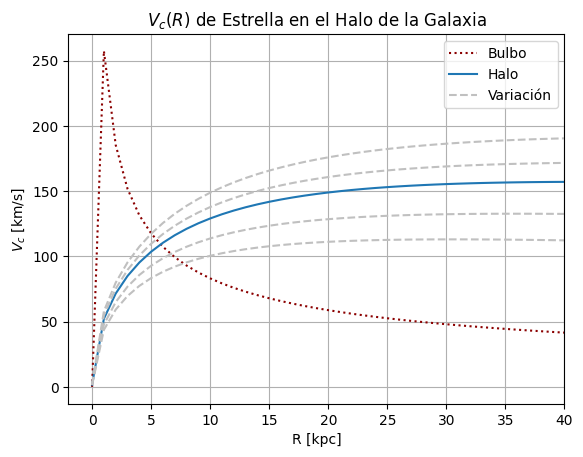

In [36]:
# Graficar Halo
plt.plot(radios, velocidades_bulbo, label='Bulbo', color='darkred', ls='dotted')
plt.plot(radios, velocidades_halo_crit, label='Halo')
plt.plot(radios, velocidades_halo_crit_0, label='Variación', color='silver', ls='--')
plt.plot(radios, velocidades_halo_crit_1, color='silver', ls='--')
# plt.plot(radios, velocidades_halo_crit_2, color='silver', ls='--')
plt.plot(radios, velocidades_halo_crit_3, color='silver', ls='--')
plt.plot(radios, velocidades_halo_crit_4, color='silver', ls='--')
plt.xlabel('R [kpc]')
plt.ylabel('$V_c$ [km/s]')
plt.title('$V_c(R)$ de Estrella en el Halo de la Galaxia')
plt.grid(True)
plt.xlim(-2, 40)
plt.legend()
plt.show()

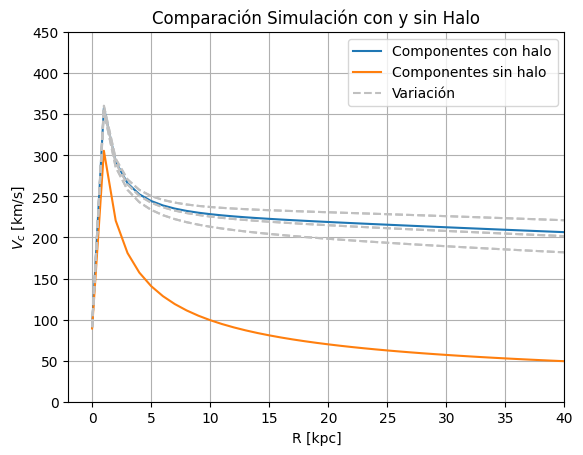

In [37]:
plt.plot(radios, (velocidades_bulbo)+(velocidades_disco_thin)+(velocidades_gas_thin)+(velocidades_disco_thick)+(velocidades_gas_thick)+(velocidades_halo_crit), label='Componentes con halo')
plt.plot(radios, (velocidades_bulbo)+(velocidades_disco_thin)+(velocidades_gas_thin)+(velocidades_disco_thick)+(velocidades_gas_thick), label='Componentes sin halo')
plt.plot(radios, (velocidades_bulbo)+(velocidades_disco_thin)+(velocidades_gas_thin)+(velocidades_disco_thick)+(velocidades_gas_thick)+(velocidades_halo_crit_1), label='Variación', color='silver', ls='--')
plt.plot(radios, (velocidades_bulbo)+(velocidades_disco_thin)+(velocidades_gas_thin)+(velocidades_disco_thick)+(velocidades_gas_thick)+(velocidades_halo_crit_1), color='silver', ls='--')
plt.plot(radios, (velocidades_bulbo)+(velocidades_disco_thin)+(velocidades_gas_thin)+(velocidades_disco_thick)+(velocidades_gas_thick)+(velocidades_halo_crit_2), color='silver', ls='--')
plt.plot(radios, (velocidades_bulbo)+(velocidades_disco_thin)+(velocidades_gas_thin)+(velocidades_disco_thick)+(velocidades_gas_thick)+(velocidades_halo_crit_2), color='silver', ls='--')
plt.plot(radios, (velocidades_bulbo)+(velocidades_disco_thin)+(velocidades_gas_thin)+(velocidades_disco_thick)+(velocidades_gas_thick)+(velocidades_halo_crit_3), color='silver', ls='--')
plt.plot(radios, (velocidades_bulbo)+(velocidades_disco_thin)+(velocidades_gas_thin)+(velocidades_disco_thick)+(velocidades_gas_thick)+(velocidades_halo_crit_3), color='silver', ls='--')

plt.xlabel('R [kpc]')
plt.ylabel('$V_c$ [km/s]')
plt.title('Comparación Simulación con y sin Halo')
plt.legend()
plt.xlim(-2, 40)
plt.ylim(0, 450)
plt.grid(True)
plt.show()

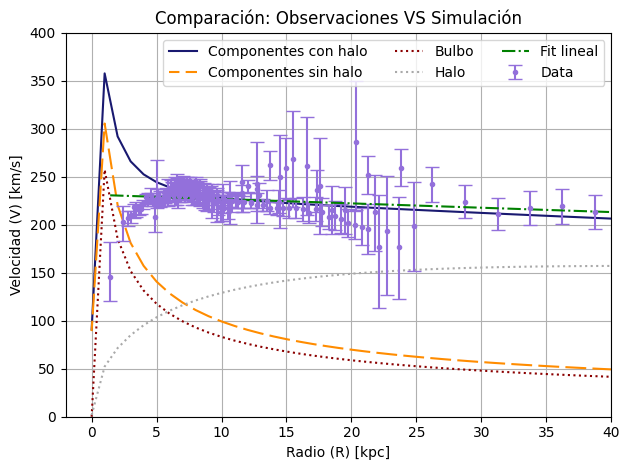

In [38]:
# Gráfica Teórica
plt.plot(radios, (velocidades_bulbo)+(velocidades_disco_thin)+(velocidades_gas_thin)+(velocidades_disco_thick)+(velocidades_gas_thick)+(velocidades_halo_crit), label='Componentes con halo', color='midnightblue')
plt.plot(radios, (velocidades_bulbo)+(velocidades_disco_thin)+(velocidades_gas_thin)+(velocidades_disco_thick)+(velocidades_gas_thick), label='Componentes sin halo', color='darkorange', ls=(5, (10, 3)))
plt.plot(radios, velocidades_bulbo, label='Bulbo', color='darkred', ls='dotted')
plt.plot(radios, velocidades_halo_crit, label='Halo', color='darkgray', ls=':')
# Gráfica Datos
dat = np.loadtxt("/content/drive/MyDrive/TOPICOS/vc_combined.dat")
R = dat[:, 0]
vc_MW = dat[:, -3]
vc_err_M = dat[:, -2]
vc_err_P = dat[:, -1]
plt.errorbar(R, vc_MW, yerr=[vc_err_M, vc_err_P], fmt='.', capsize=5, label='Data', color='mediumpurple')

# FIT
coefficients = np.polyfit(R, vc_MW, 1)  # Grado 1 para una línea recta
slope = coefficients[0]  # Pendiente
intercept = coefficients[1]  # Término independiente
R_line = np.linspace(min(R), max(R), 100)
vc_MW_line = slope * R_line + intercept
plt.plot(R_line, vc_MW_line, color='green', ls='-.', label='Fit lineal')

# Cosméticos y leyendas
plt.xlabel('Radio (R) [kpc]')
plt.ylabel('Velocidad (V) [km/s]')
plt.title('Comparación: Observaciones VS Simulación')
plt.legend(ncol=3)
plt.xlim(-2, 40)
plt.ylim(0, 400)
plt.grid(True)
plt.tight_layout()
plt.show()

#Función que parece ser perfecta

In [28]:
# Parámetros del halo galáctico
rho_0h = 0.00854e9                                        # Densidad central del halo (M_sun/kpc^3)
rho_crit = (3 * (H**2)) / (8 * np.pi * G)
rho_0h_arange = np.arange(0.0053e9, 0.0160e9, 0.00265e9)  # Rango
r_s = 19.6                                                # Scale radius del halo (kpc)
r_s_arange = np.arange(14.1, 24, 2.45)
d_c = 2.0
c = np.arange(0, 50.5, 0.5)

masas_perf = np.array([(4 * np.pi * rho_0h * (r_s**3) * (np.log(1 + c) - (c / (1 + c)))) for c in c])
velocidades_perf = np.array([velocidad_circular(r, masa) for r, masa in zip(radios, masas_perf)])
masas_perf_0 = np.array([(4 * np.pi * rho_0h_arange[0] * (r_s_arange[0]**3) * (np.log(1 + c) - (c / (1 + c)))) for c in c])
velocidades_perf_0 = np.array([velocidad_circular(r, masa) for r, masa in zip(radios, masas_perf_0)])
masas_perf_1 = np.array([(4 * np.pi * rho_0h_arange[1] * (r_s_arange[1]**3) * (np.log(1 + c) - (c / (1 + c)))) for c in c])
velocidades_perf_1 = np.array([velocidad_circular(r, masa) for r, masa in zip(radios, masas_perf_1)])
masas_perf_2 = np.array([(4 * np.pi * rho_0h_arange[2] * (r_s_arange[2]**3) * (np.log(1 + c) - (c / (1 + c)))) for c in c])
velocidades_perf_2 = np.array([velocidad_circular(r, masa) for r, masa in zip(radios, masas_perf_2)])
masas_perf_3 = np.array([(4 * np.pi * rho_0h_arange[3] * (r_s_arange[3]**3) * (np.log(1 + c) - (c / (1 + c)))) for c in c])
velocidades_perf_3 = np.array([velocidad_circular(r, masa) for r, masa in zip(radios, masas_perf_3)])
masas_perf_4 = np.array([(4 * np.pi * rho_0h_arange[4] * (r_s_arange[4]**3) * (np.log(1 + c) - (c / (1 + c)))) for c in c])
velocidades_perf_4 = np.array([velocidad_circular(r, masa) for r, masa in zip(radios, masas_perf_4)])

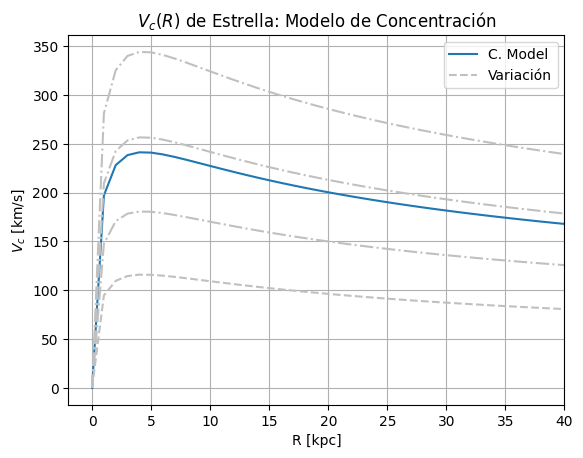

In [29]:
# Graficar Perfecta
plt.plot(radios, velocidades_perf, label='C. Model')
# plt.plot(radios, (velocidades_bulbo)+(velocidades_disco_thin)+(velocidades_gas_thin)+(velocidades_halo_crit), label='Thin. Con halo')
# plt.plot(radios, (velocidades_bulbo)+(velocidades_disco_thick)+(velocidades_gas_thick)+(velocidades_halo_crit), label='Thick. Con halo', color='green')
plt.plot(radios, velocidades_perf_0, label='Variación', color='silver', ls='--')
plt.plot(radios, velocidades_perf_1, color='silver', ls='-.')
plt.plot(radios, velocidades_perf_2, color='silver', ls='-.')
plt.plot(radios, velocidades_perf_3, color='silver', ls='-.')
# plt.plot(radios, velocidades_perf_crit_4, color='silver', ls='-.')

plt.xlabel('R [kpc]')
plt.ylabel('$V_c$ [km/s]')
plt.title('$V_c(R)$ de Estrella: Modelo de Concentración')
plt.grid(True)
plt.xlim(-2, 40)
plt.legend()
plt.show()

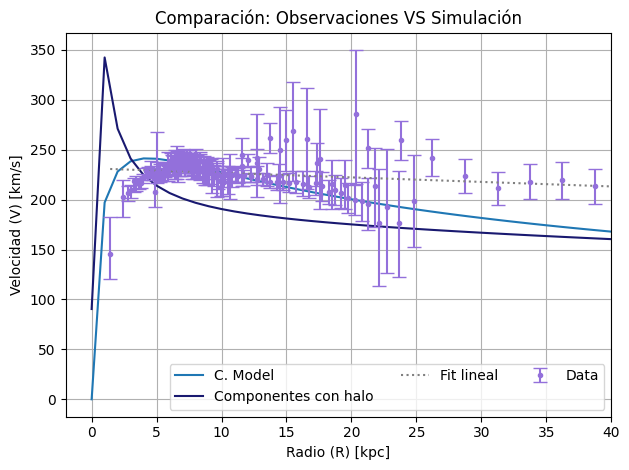

In [30]:
# Gráfica Teórica
plt.plot(radios, velocidades_perf, label='C. Model')
plt.plot(radios, (velocidades_bulbo)+(velocidades_disco_thin)+(velocidades_gas_thin)+(velocidades_disco_thick)+(velocidades_gas_thick)+(velocidades_halo_crit), label='Componentes con halo', color='midnightblue')

# Gráfica Datos
dat = np.loadtxt("/content/drive/MyDrive/TOPICOS/vc_combined.dat")
R = dat[:, 0]
vc_MW = dat[:, -3]
vc_err_M = dat[:, -2]
vc_err_P = dat[:, -1]
plt.errorbar(R, vc_MW, yerr=[vc_err_M, vc_err_P], fmt='.', capsize=5, label='Data', color='mediumpurple')

# FIT
coefficients = np.polyfit(R, vc_MW, 1)  # Grado 1 para una línea recta
slope = coefficients[0]  # Pendiente
intercept = coefficients[1]  # Término independiente
R_line = np.linspace(min(R), max(R), 100)
vc_MW_line = slope * R_line + intercept
plt.plot(R_line, vc_MW_line, color='grey', ls='dotted', label='Fit lineal')

# Cosméticos y leyendas
plt.xlabel('Radio (R) [kpc]')
plt.ylabel('Velocidad (V) [km/s]')
plt.title('Comparación: Observaciones VS Simulación')
plt.legend(ncol=3)
plt.xlim(-2, 40)
plt.grid(True)
plt.tight_layout()
plt.show()